In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy


from helper import *
from corr_func import *

In [3]:
img = np.random.random((50,50))
kern = np.ones((3,3)) / 9

# In Built Correlation

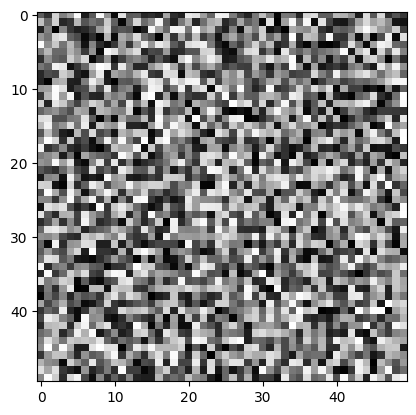

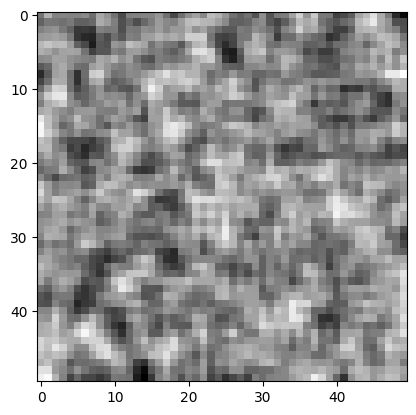

In [4]:
conv_out = cv2.filter2D(img, -1, kernel=kern)

view_image(img)
view_image(conv_out)

# User Defined Correlation

## Normal/Brute Method
Time Complexity - O(n^4)

### Checking validity of algorithm

In [5]:
img = np.random.random((5, 5))
kern = np.random.random((3,3))

cv2_out = cv2.filter2D(img, -1, kern, borderType=cv2.BORDER_CONSTANT)
brute_out = corr_brute(img, kern)

print(np.allclose(cv2_out, brute_out))

True


## Correlation using FFT

In [12]:
x2 = np.random.random((9,9))

print(np.allclose(IFFT_2D(FFT_2D(x2))[:9,:9], x2))

True


In [14]:
img = np.random.random((9,9))
kern = np.random.random((3,3))

True

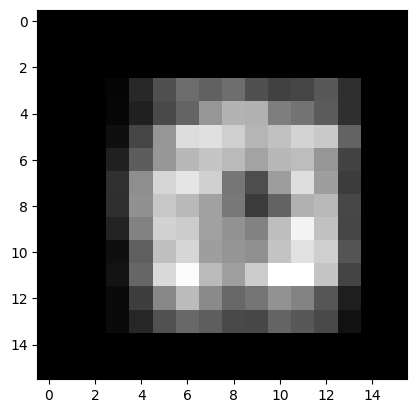

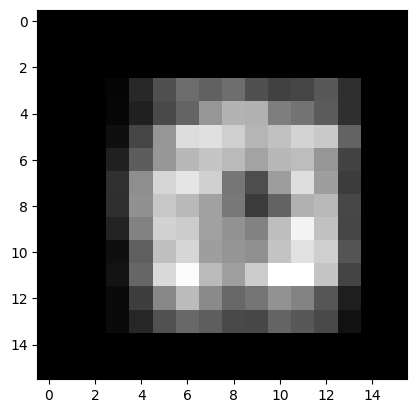

In [21]:
img_pad, kern_pad = pad_img_kern(img, kern)
out_corr_fft = corr_fft(img_pad, kern_pad)
out_corr_fft = np.roll(out_corr_fft, shift=8, axis=[0,1])
cv2_out = cv2.filter2D(img_pad, -1, kern_pad, borderType=cv2.BORDER_CONSTANT)
view_image(out_corr_fft)
view_image(cv2_out)
np.allclose(out_corr_fft,cv2_out)

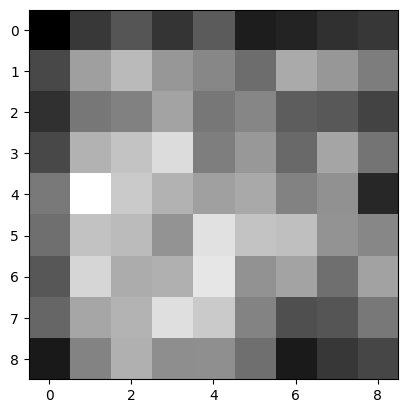

In [11]:
view_image(scipy.signal.convolve2d(img, kern, mode="same"))